In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("C:/Users/User\Downloads\Resume.csv")

In [7]:
df.head()

,Resumes,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume


In [9]:
df.sample(5)

,Resumes,Category
10,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer Resume
51,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer Lightning Insight Resume
31,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resume
46,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
44,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume


In [11]:
df.shape

(79, 2)

In [13]:
df['Category'].unique()

array(['React JS Developer Resume', 'PeopleSoft resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [15]:
df['Category'].value_counts()

Category
React JS Developer Resume                 24
Workday Resume                            21
PeopleSoft resume                         20
SQL Developer Lightning Insight Resume    14
Name: count, dtype: int64

# Data Visualization

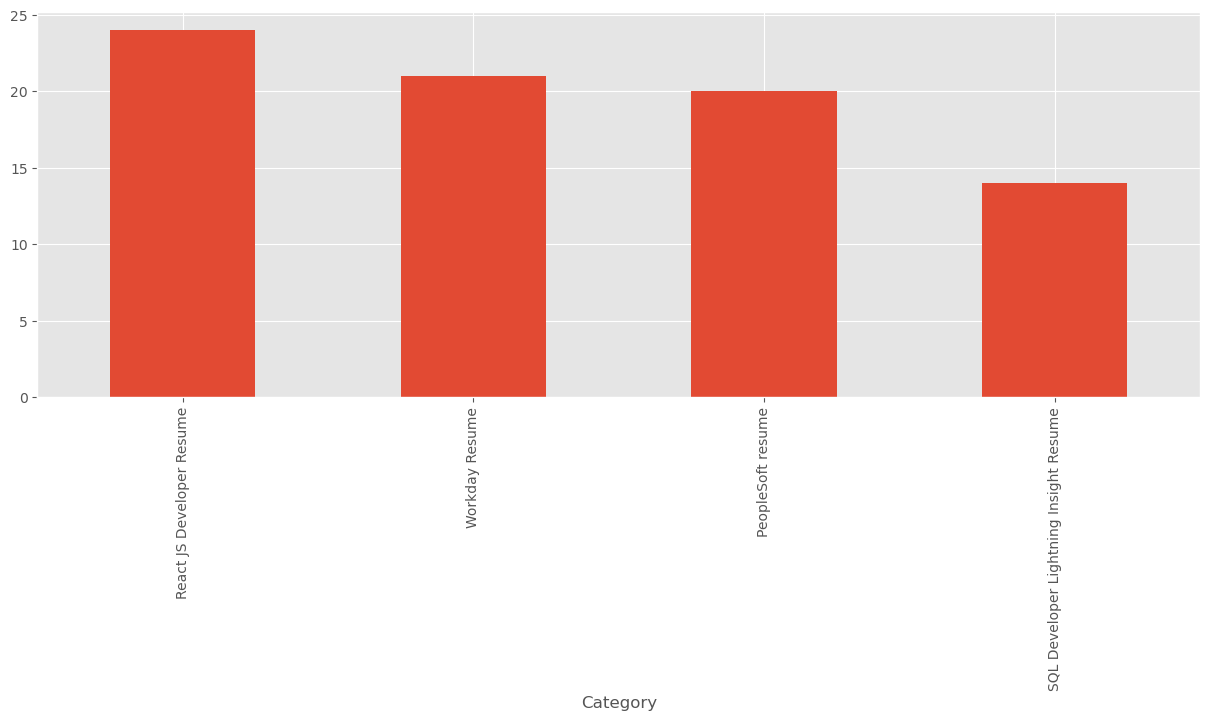

In [18]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.show()

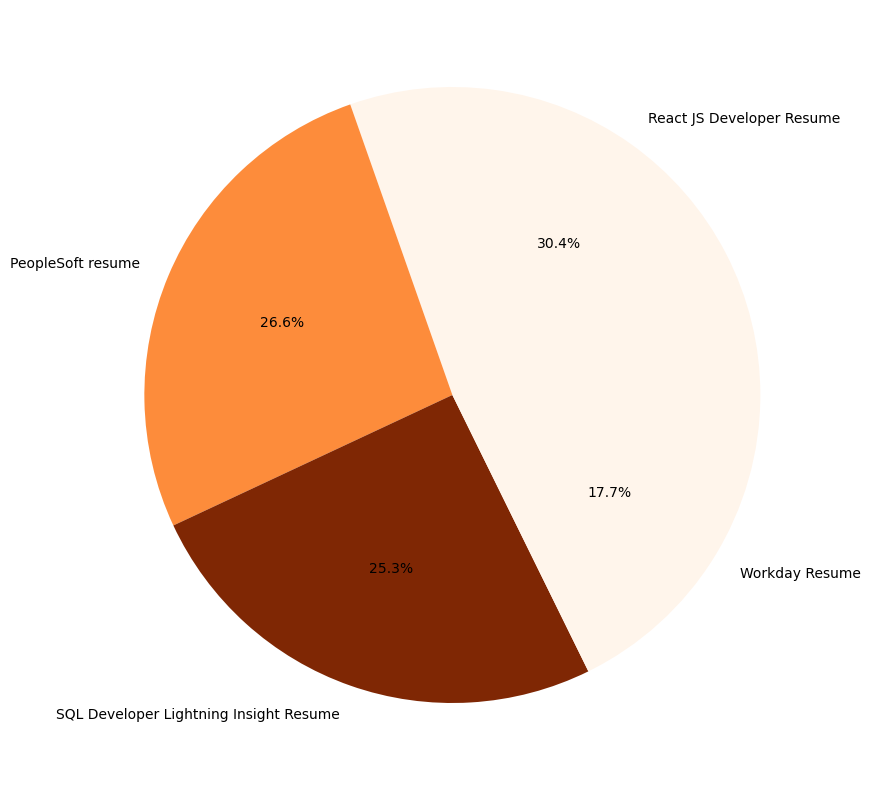

In [20]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [24]:
# Text cleaning using NLP
df['Resumes'][0]

'Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\

# Remove URL
# Remove Emails
# Remove Special Character
# Remove stop words

In [27]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text

In [31]:
#Example
s = 'Hello, $%& I found this # article at https://www.chando.com ! You can contact me at chando@example.com'

In [33]:
clean(s)

'Hello found article contact'

In [35]:
df['Resumes'] = df['Resumes'].apply(lambda x:clean(x))

In [39]:
df['Resumes'][0]

'Name Ravali P Curriculum Vitae Specialization computer science Engg C R EE R OB JE CT V E C R EE R OB JE CT V E utilize technical skills achieving target developing best performance organization E U C ION E U C ION DegreeCourse CollegeInstitute University Board Percentage CGPA Year Passing CGPACGPA J B Institute technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board Technical Examination Bengaluru 60 2017 SSLC Empress girls high school Karnataka Secondary Education Board 528 2011 MANUAL TESTING SKILLS Strong knowledge SDLC concepts Extensive knowledge White Box Testing Good knowledge Functional testing Integration testing Extreme Knowledge System Testing Good knowledge Adhoc Testing Reliability testing Good Knowledge Exploratory Testing Good knowledge STLC concepts Good knowledge Test cases Test scenarios Good knowledge globalization testing compatibility testing Knowledge Regression Testing Good knowledge Test plan QL K Goo k n w l e g e n RD B c n c e p G

# Encoding

In [42]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
df['Category'].unique()

array([1, 0, 2, 3])

In [120]:
# Get the classes from the LabelEncoder
categories_mapping = le.classes_

# Display the mapping from encoded label to category
for index, category in enumerate(categories_mapping):
    print(f"Encoded label {index} -> Category: {category}")


Encoded label 0 -> Category: PeopleSoft resume
Encoded label 1 -> Category: React JS Developer Resume
Encoded label 2 -> Category: SQL Developer Lightning Insight Resume
Encoded label 3 -> Category: Workday Resume


In [48]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resumes'])
resume = tfidf.transform(df['Resumes'])

In [50]:
X_train , X_test, y_train , y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)

In [52]:
X_train.shape

(63, 5356)

In [54]:
y_train.shape

(63,)

In [56]:
X_test.shape

(16, 5356)

In [58]:
y_test.shape

(16,)

### Logistics Regression with Hyperparameter Tuning

Tune Logistic Regression using key hyperparameters like:

C: Regularization strength

penalty: Type of regularization

solver: Optimization algorithm

We’ll use saga solver as it's compatible with multiple penalties.

### Tuning a Logistic Regression model to find the best combination of hyperparameters that improve performance (using F1-score as the metric).

"We used RandomizedSearchCV to automatically test different combinations of hyperparameters for Logistic Regression. This allowed me to find the best settings (like regularization strength C, penalty type, and iterations) that improved model performance, specifically using macro F1-score. The saga solver was chosen because it supports all penalty types, including elasticnet. Once tuned, we used the best model to make predictions on the test set."

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


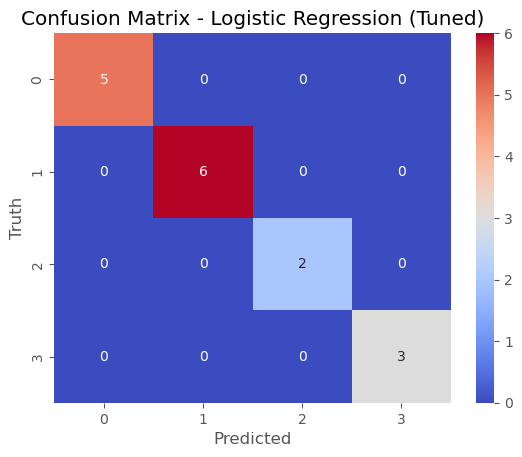


Best Parameters Found: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'l1_ratio': np.float64(0.0), 'C': np.float64(100.0)}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grid for Logistic Regression
param_grid = {
    'C': np.logspace(-3, 3, 7),  # [0.001, 0.01, ..., 1000]
    'penalty': ['l1', 'l2', 'elasticnet'],  # types of regularization
    'solver': ['saga'],
    'max_iter': [100, 500, 1000],
    'l1_ratio': np.linspace(0, 1, 5)  # Only used if penalty='elasticnet'
}


### C: Controls regularization strength (smaller = stronger regularization). You’re testing values from 0.001 to 1000.
   ### Regularization is a technique used in machine learning to prevent overfitting

### penalty: Type of regularization:

### l1: Lasso (feature selection),

### l2: Ridge (shrink coefficients),

### elasticnet: Combo of both.

### solver='saga': The optimization algorithm; saga supports all three penalties.

### max_iter: Number of iterations for convergence.

### l1_ratio: Only used with elasticnet. Controls the mix between l1 and l2.

# Initialize Logistic Regression
lg = LogisticRegression(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=lg,
    param_distributions=param_grid,
    n_iter=20,  # number of random combinations to try
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


### estimator=lg: The Logistic Regression model you're tuning.

#### param_distributions: The grid of hyperparameters to test.

#### n_iter=20: Randomly tries 20 combinations instead of testing all — faster than Grid Search.

### scoring='f1_macro': Evaluates based on macro F1-score (averaged across all classes).

### cv=3: 3-fold cross-validation — splits data into 3 parts and tests accuracy on each.

### n_jobs=-1: Uses all CPU cores for speed.

### verbose=2: Shows progress during training.

#### random_state=42: Ensures reproducible results.

# Fit on training data
random_search.fit(X_train, y_train)

# Get best model
best_lg = random_search.best_estimator_

# Predict
predict1 = best_lg.predict(X_test)

# Metrics
accuracy_1 = round(accuracy_score(y_test, predict1), 4)
precision_1 = round(precision_score(y_test, predict1, average='macro'), 4)
recall_1 = round(recall_score(y_test, predict1, average='macro'), 4)
f1_1 = round(f1_score(y_test, predict1, average='macro'), 4)

# Confusion Matrix
cm = confusion_matrix(y_test, predict1)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()

# Report
print("\nBest Parameters Found:", random_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, predict1))
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)


### SVC Hyperparameters to Tune
C: Regularization parameter (controls margin hardness)

kernel: Type of kernel function (linear, rbf, etc.)

gamma: Kernel coefficient (only for rbf, poly, sigmoid)

degree: Only used for poly kernel

RandomizedSearchCV to tune a Support Vector Classifier (SVC) by finding the best combination of hyperparameters that improves performance based on the F1-score (macro average).

“We used RandomizedSearchCV to tune the Support Vector Classifier by testing 15 random combinations of hyperparameters like the regularization strength (C), kernel type (linear, rbf, poly), and parameters like gamma and degree. We selected the best model based on the macro F1-score using 3-fold cross-validation. This helps improve classification accuracy while handling multiclass imbalances effectively.”

Fitting 3 folds for each of 15 candidates, totalling 45 fits


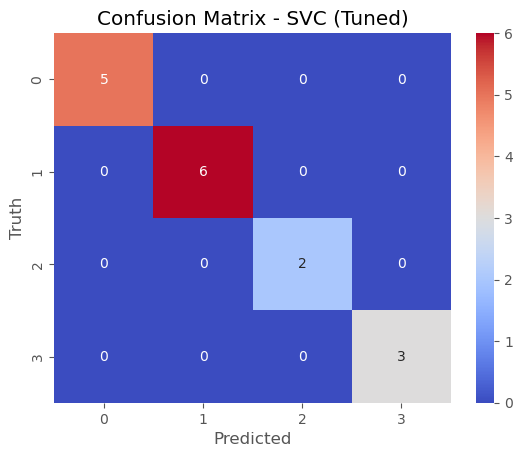


Best Parameters Found: {'kernel': 'linear', 'gamma': 'scale', 'degree': 2, 'C': 1}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # only used when kernel='poly'
}

### C: Regularization parameter. Smaller values mean more regularization. You’re testing C = 0.1 to 100.

### kernel: The kernel function determines how data is transformed:

### linear: Straight line separation.

### rbf: Non-linear Gaussian kernel.

### poly: Polynomial function.

### gamma: Defines how far the influence of a single training example reaches.

#### scale: Default, uses 1 / (n_features * X.var()).

### auto: Uses 1 / n_features.

### degree: Only applicable when kernel='poly'. It sets the degree of the polynomial function.

### This grid covers both linear and non-linear decision boundaries.



# Initialize SVC
sv = SVC(probability=True, random_state=42)

### Initializes a Support Vector Classifier.

### probability=True: Enables probability estimates (needed if you're using .predict_proba() later).

### random_state=42: Ensures reproducibility of results.

# Randomized Search
sv_random = RandomizedSearchCV(
    estimator=sv,
    param_distributions=param_grid,
    n_iter=15,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

### estimator=sv: This is the base model (SVC) we want to tune.

### param_distributions=param_grid: Uses the parameter grid we defined above.

### n_iter=15: Randomly tries 15 different combinations from the grid instead of testing all (faster).

### scoring='f1_macro': Evaluates using macro F1-score (good for multiclass classification).

### cv=3: 3-fold cross-validation to avoid overfitting and test generalization.

### n_jobs=-1: Uses all CPU cores for parallel processing (faster).

### verbose=2: Displays detailed output while running.

### random_state=42: Ensures the randomness in sampling is consistent every time.


# Fit model
sv_random.fit(X_train, y_train)

# Best model
best_svc = sv_random.best_estimator_

# Predict
predict2 = best_svc.predict(X_test)

# Metrics
accuracy_2 = round(accuracy_score(y_test, predict2), 4)
precision_2 = round(precision_score(y_test, predict2, average='macro'), 4)
recall_2 = round(recall_score(y_test, predict2, average='macro'), 4)
f1_2 = round(f1_score(y_test, predict2, average='macro'), 4)

# Confusion Matrix
cm2 = confusion_matrix(y_test, predict2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix - SVC (Tuned)")
plt.show()

# Output
print("\nBest Parameters Found:", sv_random.best_params_)
print("\nClassification Report:\n", classification_report(y_test, predict2))
print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)


### Hyperparameter Tuning to Your Naive Bayes Code

Multinomial Naive Bayes has very few hyperparameters, but the most important one is:

alpha (smoothing parameter): Helps with zero-frequency issues; tuning it can boost performance.


"For the Multinomial Naive Bayes model, We tuned the alpha parameter, which controls smoothing, using GridSearchCV. we tested values from 0.0 to 2.0 in steps of 0.1 to find the value that gives the best macro F1-score using 3-fold cross-validation. Grid Search is efficient here because there's only one key hyperparameter.”

Fitting 3 folds for each of 21 candidates, totalling 63 fits


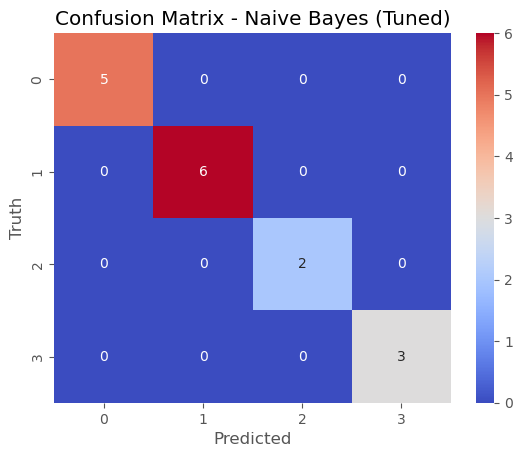


Best Alpha Found: {'alpha': np.float64(0.1)}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameter grid for MultinomialNB
param_grid = {
    'alpha': np.linspace(0.0, 2.0, 21)  # Try values from 0 to 2
}

### alpha: This is the Laplace smoothing parameter.

### If alpha=0.0, there's no smoothing — which may cause errors when a feature doesn’t appear in the training data.

### Higher alpha values add more smoothing, reducing variance but potentially adding bias.

### np.linspace(0.0, 2.0, 21) generates 21 values from 0 to 2 (inclusive), spaced evenly (like 0.0, 0.1, ..., 2.0).

### we're testing a wide range of smoothing values to find the one that balances bias and variance best.

# Initialize the model
nb = MultinomialNB()

### This initializes the Multinomial Naive Bayes classifier, which is well-suited for text classification tasks using TF-IDF or count-based features.



# Grid Search
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           scoring='f1_macro', cv=3, verbose=2, n_jobs=-1)


### estimator=nb: The model to tune is MultinomialNB.

### param_grid: You're testing different values of alpha.

### scoring='f1_macro': Optimizing based on macro-averaged F1-score — important for multiclass classification with possibly imbalanced classes.

### cv=3: 3-fold cross-validation — splits the data into 3 parts, trains on 2, tests on 1, and repeats.

### verbose=2: Shows detailed progress while running.

### n_jobs=-1: Uses all available CPU cores to make the search faster.

grid_search.fit(X_train, y_train)

# Get best model
best_nb = grid_search.best_estimator_

# Predict
predict4 = best_nb.predict(X_test)

# Metrics
accuracy_4 = round(accuracy_score(y_test, predict4), 4)
precision_4 = round(precision_score(y_test, predict4, average='macro'), 4)
recall_4 = round(recall_score(y_test, predict4, average='macro'), 4)
f1_4 = round(f1_score(y_test, predict4, average='macro'), 4)

# Confusion Matrix
cm4 = confusion_matrix(y_test, predict4)
sns.heatmap(cm4, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix - Naive Bayes (Tuned)")
plt.show()

# Report
print("\nBest Alpha Found:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, predict4))
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)


alpha = 1.0 is default, but values like 0.1 or 0.01 often work better on sparse TF-IDF matrices.

Grid Search is enough here since the hyperparameter space is small.

In [112]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [130]:
myresume = """ANIL KUMAR MADDUKURI  		

SQL & MSBI Developer   



		



Summary



2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.

Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.

Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms.

Hands on experience in creation, optimization and debugging Stored Procedure and Functions.

Familiar in writing queries using CTE, Temporary Tables and Table Variables.

Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.

Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.

Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.

Used containers such as for each loop container and sequence container to load the data from multiple source file to Database tables.

Expertise in using tasks like  Data flow Task, Execute SQL task ,Control Flow task Execute package task, Execute Process task, Bulk insert Task,  Sends Mail task and FTP Task and Script task at the control flow level .

Experience in using Data conversion,OLEDB command, Row count, Union All, Derived Column, Merge, Merge Join, Fuzzy lookup, Conditional Split and various other Transformation to manipulate data in SSIS package at the Data Flow Level for moving typical data from source to destination.

Implemented SSIS Loggings, check-points Break points and package configurations source system to another source system and ETL operations.

Good experience in developing Table Reports, Sub Reports, Matrix Reports, Drill down Reports, Drill through Reports using SQL Server Reporting Services.

Involved in Linked reports, Cache reports, and Snapshot reports in report manager level.

Expertise in performing backup and restore the database.

Created Indexes like Clustered Index and Non-Clustered Index to improve the performance.



Technical Skills

Languages	           :  SQL, T-SQL

RDBMS	           :  SQL Server 2016/2012/2008 

ETL Tools	           :  SQL Server Integration Services (SSIS)

Reporting Tools         :  SQL Server Reporting Tools (SSRS)



Professional Experience

Currently working as Software Engineer in Imagine TechnologyÂ and Services Pvt. Ltd 

       Since 2019 to till date.

Project Experience

Project			:  Health Insurance

Client			:  Aetna, USA

Environment		:  MS SQL SERVER 2016, SSIS, SSRS, Visual Studio 2015 

Duration		:  April 2019 to Till Date



Description: 

This project is developed for Aetna Insurance. This is an American managed health care company sells traditional and consumer directed health care insurance and related services, Such as medical, dental, long-term care, and disability plans, primarily through employer-paid (fully or partly) insurance and benefit programs. The main goal of this project Implementing Customer Information into Database and Developing mechanism to revert data from database. 

		Responsibilities: 



Create/update indexes, views, Stored Procedures, user defined functions, common table expressions (CTEs) and Triggers. 

Develop SSIS Packages by extracting data from diversified sources like Excel, CSV, flat file, Text and load into staging area.

Use transformations like Aggregate, Conditional Split, Derived Columns, Row Count, Merge and Merge Join, Multicast, Slowly Changing Dimension to manipulate data in data flow level

Implement event handlers for the packages, maintain log information and provide checkpoints in SSIS level. 

Design packages in control flow levels based on tasks like Data Flow Task, Execute SQL Task, FTP tasks and used For Each Loop Container, Sequential Container.

Generate reports in the form of Matrix, Table by using SSRS from SQL Server Database and included various reporting features such as drilldown, drill through, sub reports. 

Involved in setting up SQL Server Agent Jobs for periodic Backups with backup devices, database maintenance plans and recovery.

Maintained / managed database agent jobs, check for failures and resolve failure issues.

Used SQL Profiler and query tuning Wizard to troubleshoot problems and queries.



Education

B.Tech - Velagapudi siddhartha engineering college,Vijayawada"""

In [132]:
df.head()

,Resumes,Category
0,Name Ravali P Curriculum Vitae Specialization ...,1
1,SUSOVAN BAG Seeking challenging position field...,1
2,Kanumuru Deepak Reddy CAREER OBJECTIVE secure ...,1
3,HARIPRIYA BATTINA Experience UI Developer Reac...,1
4,KAMALAKAR REDDY Linked PROFESSIONAL SUMMARY 3 ...,1


In [134]:
cleaned_resume = clean(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    1 : "React JS Developer",
    3 : "Workday Resume",
    0 : "PeopleSoft resume",
    2 : "SQL Developer Lightning Insight Resume"
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  SQL Developer Lightning Insight Resume
